In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)
import matplotlib.font_manager
fpaths = matplotlib.font_manager.findSystemFonts()
for i in fpaths:
    f = matplotlib.font_manager.get_font(i)


In [3]:
data2019 = pd.read_csv('Statistiques médicaments 2019 Vicherey.csv', sep=';')
data2020 = pd.read_csv('Statistiques médicaments 2020 Vicherey.csv', sep=';')
data2021 = pd.read_csv('Statistiques médicaments 2021 Vicherey.csv', sep=';')

In [4]:
data2019 = data2019.fillna('')
data2020 = data2020.fillna('')
data2021 = data2021.fillna('')

In [5]:
def treat_df(data2019):
    col1 = data2019.columns.to_list()[0]
    for i in range(len(data2019)):
        if data2019[col1][i] in ['C.A.', 'Quantité', 'Marge', '']:
            data2019.drop(i, inplace=True)
    data2019 = data2019[data2019['Unnamed: 8'] != '']
    data2019 = data2019.rename(columns={'Unnamed: 9': 'Revenue', 'Unnamed: 13': 'Quantity', 'Unnamed: 19': 'Profit'})
    c = data2019.columns.to_list()
    cols = [x for x in c if 'Unnamed' in x]
    data2019 = data2019.drop(columns=cols, axis=1)
    data2019['Revenue'] = pd.to_numeric(data2019['Revenue'], errors='coerce')
    data2019['Revenue'] = data2019['Revenue'].fillna(0)
    data2019['Quantity'] = pd.to_numeric(data2019['Quantity'], errors='coerce')
    data2019['Quantity'] = data2019['Quantity'].fillna(0)
    data2019['Profit'] = pd.to_numeric(data2019['Profit'], errors='coerce')
    data2019['Profit'] = data2019['Profit'].fillna(0)
    data2019['Price'] = data2019['Revenue']/data2019['Quantity']
    data2019['Unit Cost'] = (data2019['Revenue'] - data2019['Profit'])/data2019['Quantity']
    data2019['Unit Cost'] = (data2019['Revenue'] - data2019['Profit'])/data2019['Quantity']
    data2019['Profit margin'] = (data2019['Price']-data2019['Unit Cost'])/data2019['Price']
    
    return data2019

In [6]:
df2020 = treat_df(data2020)
df2019 = treat_df(data2019)
df2021 = treat_df(data2021)

### Pricing analysis for medicines that have the highest revenues

In [7]:
x = 'Revenue' # or 'Profit'
order = False # or True

sorted2019 = df2019.sort_values(by=[x], ascending=order).iloc[0:-1]
sorted2020 = df2020.sort_values(by=[x], ascending=order).iloc[0:-1]
sorted2021 = df2021.sort_values(by=[x], ascending=order).iloc[0:-1]

sorted2019.index = sorted2019.iloc[:,0].to_list()
sorted2020.index = sorted2020.iloc[:,0].to_list()
sorted2021.index = sorted2021.iloc[:,0].to_list()

sorted2021.head()

,Statistiques médicaments 2021,Revenue,Quantity,Profit,Price,Unit Cost,Profit margin
TOLFINE INJ 250ML,TOLFINE INJ 250ML,24964.15,187.00,144.51,133.498128,132.725348,0.005789
MASTIJET,MASTIJET,13236.77,147.30,4412.10,89.862661,59.909504,0.333321
SHOTAPEN,SHOTAPEN,9248.22,98.23,4624.10,94.148631,47.074417,0.499999
VETRIMOXIN 48 H,VETRIMOXIN 48 H,9041.10,133.33,4520.55,67.809945,33.904973,0.500000
NUFLOR 450,NUFLOR 450,8794.95,39.00,4141.57,225.511538,119.317436,0.470903


In [8]:
# Update purchase price

l_df_ = [sorted2019, sorted2020, sorted2021]

for i in l_df_:
    for j in range(len(i)):
        if 'TOLFINE' in i.iloc[j,0]:
            i.iloc[j,5] = 0.21*i.iloc[j,5]

for i in l_df_:
    for j in range(len(i)):
        if 'CYDECTINE 0.5% POUR ON' in i.iloc[j,0]:
            i.iloc[j,5] = 0.41*i.iloc[j,5]

for i in l_df_:
    for j in range(len(i)):
        if 'NEOPRINIL POUR ON BOVINS 5MG/ML' in i.iloc[j,0]:
            i.iloc[j,5] = 0.33*i.iloc[j,5]

for i in l_df_:
    for j in range(len(i)):
        if 'METACAM' in i.iloc[j,0]:
            i.iloc[j,5] = 0.30*i.iloc[j,5]
           
        
        

sorted2021.head()

,Statistiques médicaments 2021,Revenue,Quantity,Profit,Price,Unit Cost,Profit margin
TOLFINE INJ 250ML,TOLFINE INJ 250ML,24964.15,187.00,144.51,133.498128,27.872323,0.005789
MASTIJET,MASTIJET,13236.77,147.30,4412.10,89.862661,59.909504,0.333321
SHOTAPEN,SHOTAPEN,9248.22,98.23,4624.10,94.148631,47.074417,0.499999
VETRIMOXIN 48 H,VETRIMOXIN 48 H,9041.10,133.33,4520.55,67.809945,33.904973,0.500000
NUFLOR 450,NUFLOR 450,8794.95,39.00,4141.57,225.511538,119.317436,0.470903


In [9]:
sorted2019abc = sorted2019
sorted2020abc = sorted2020
sorted2021abc = sorted2021

sorted2019abc['Cumulative revenue'] = np.nan
sorted2020abc['Cumulative revenue'] = np.nan
sorted2021abc['Cumulative revenue'] = np.nan

l_df = [sorted2019abc, sorted2020abc, sorted2021abc]


j = 0

for i in l_df:
    i.iloc[:,0] = [k for k in range(len(i))]
    if 'MEDICAMENTS' in list(i.index):
        i.drop(index='MEDICAMENTS', inplace = True)
    j = 0
    for j in range(len(i)):
        if j == 0:
            i['Cumulative revenue'].iloc[j] = float(i['Revenue'].iloc[j]/i['Revenue'].sum())
        if j > 0:
            i['Cumulative revenue'].iloc[j] = float(i['Revenue'].iloc[j]/i['Revenue'].sum()) + float(i['Cumulative revenue'].iloc[j-1])

sorted2021abc.head()

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Statistiques médicaments 2021,Revenue,Quantity,Profit,Price,Unit Cost,Profit margin,Cumulative revenue
TOLFINE INJ 250ML,0,24964.15,187.00,144.51,133.498128,27.872323,0.005789,0.044898
MASTIJET,1,13236.77,147.30,4412.10,89.862661,59.909504,0.333321,0.068704
SHOTAPEN,2,9248.22,98.23,4624.10,94.148631,47.074417,0.499999,0.085337
VETRIMOXIN 48 H,3,9041.10,133.33,4520.55,67.809945,33.904973,0.500000,0.101597
NUFLOR 450,4,8794.95,39.00,4141.57,225.511538,119.317436,0.470903,0.117415


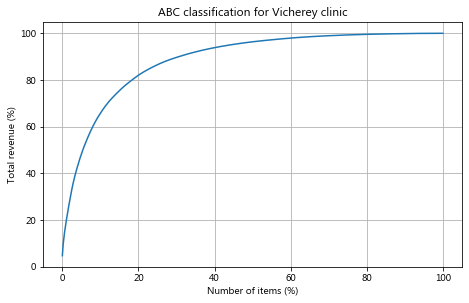

In [10]:
item_nbr = list(sorted2019abc.iloc[:,0]/sorted2019abc.iloc[-1,0]*100)
cum_rev = list(sorted2019abc.iloc[:,7]*100)
font = 'Microsoft New Tai Lue'
plt.rcParams["figure.figsize"] = (7.5,4.5)

plt.plot(item_nbr, cum_rev)
plt.xlabel('Number of items (%)', fontname = font)
plt.ylabel('Total revenue (%)', fontname = font)
plt.xticks(fontname = font)
plt.title('ABC classification for Vicherey clinic', fontname=font)
plt.yticks(fontname = font)
plt.grid(visible=True)
plt.savefig('ABC classification for Vicherey clinic.png')

plt.show()

In [11]:
topmeds = []

topmeds.append(list(sorted2021.index)[0])
topmeds.append(list(sorted2021.index)[1])
topmeds.append(list(sorted2021.index)[2])

lst2021 = list(sorted2021.index)
lst2020 = list(sorted2020.index)
lst2019 = list(sorted2019.index)

# possible to extend list of medicines to analyze by increasing lists here

i = 0

while len(topmeds) <= 90:
    if lst2020[i] not in topmeds:
        if lst2020[i] in list(set(lst2021) & set(lst2019)):
            topmeds.append(df2020.sort_values(by=['Revenue'], ascending=False).iloc[i, 0])
    i = i+1

i = 0   
    
while len(topmeds) <= 132:
    if lst2019[i] not in topmeds:
        if lst2019[i] in list(set(lst2021) & set(lst2020)):
            topmeds.append(df2019.sort_values(by=['Revenue'], ascending=False).iloc[i, 0])
    i = i+1



print(topmeds)

Data = pd.DataFrame(index = topmeds, columns=['P_2019', 'Q_2019', 'P_2020', 'Q_2020', 'P_2021', 'Q_2021', 'Cost_2019', 
                                             'Cost_2020', 'Cost_2021'])  



['TOLFINE INJ 250ML', 'MASTIJET', 'SHOTAPEN', 'NUFLOR 450', 'CYDECTINE 0.5% POUR ON', 'ORBENOR HL', 'DRAXXIN SOL INJ', 'PAROFOR', 'OXYTETRIN SPRAY 220G', 'ORBESEAL HL', 'ROTAVEC CORONA', 'AMPHOPRIM', 'RISPOVAL INTRANASAL', 'PATURAGE LONG', 'HISTACLINE FL CLAS', 'VIRBAMEC D INJ', 'CLAMOXYL OBLET', 'CYDECTINE 0.5% POUR ON*', 'RISPOVAL 3 BRSV PI3 BVD', 'NEOPRINIL POUR ON BOVINS 5MG/ML', 'FATROX', 'UBROLEXIN', 'DOUVISTOME', 'BOVELA 50 DOSES SUSPENSION INJECTABLE', 'TOLFINE INJ 100ML', 'DUPHAMOX LA', 'OBITARIE', 'ESTRUMATE', 'REPIDOSE FARMINTIC 5X1250 (5CP)', 'SYNULOX INTRA MAM', 'TENALINE LA', 'DOLISOVET INTRAMMAIRE', 'CYDECTINE TRICLAMOX BOVINS POUR ON', 'BOVIGEN SCOUR 5 DOSES', 'PRASCEND', 'ENERLYTE PLUS SA', 'ORBENIN HL', 'BOVILIS BOVIGRIP SUSP.INJ', 'FLUKIVER', 'CEPRAVIN HL 100 APPLI', 'CHORULON 1500 UI', 'TILDREN', 'ROMPUN 2 %', 'UBROSEAL INTRAMMAMAIRE', 'VIRBAMEC PO', 'ORBESEAL HL SEAU DE 120', 'INFLACAM 330MG GRANULES POUR CHEVAUX', 'VECOXAN 2.5 L', 'BRAVECTO POUR CHIEN DE 20KG A 40

In [12]:
for i in topmeds:
    
    Data.at[i,'P_2019'] = sorted2019.loc[i,'Price'].sum()
    Data.at[i,'Q_2019'] = sorted2019.loc[i,'Quantity'].sum()
    Data.at[i,'P_2020'] = sorted2020.loc[i,'Price'].sum()
    Data.at[i,'Q_2020'] = sorted2020.loc[i,'Quantity'].sum()
    Data.at[i,'P_2021'] = sorted2021.loc[i,'Price'].sum()
    Data.at[i,'Q_2021'] = sorted2021.loc[i,'Quantity'].sum()
    Data.at[i,'Cost_2019'] = sorted2019.loc[i,'Unit Cost'].sum()
    Data.at[i,'Cost_2020'] = sorted2020.loc[i,'Unit Cost'].sum()
    Data.at[i,'Cost_2021'] = sorted2021.loc[i,'Unit Cost'].sum()
        
    # update purchase prices

for i in range(len(Data)):
    for j in range(len(Data.iloc[0,:])):
        Data.iloc[i,j] = float(Data.iloc[i,j])

Data.drop(index='IMOCOLIBOV', inplace = True)        
topmeds.remove('IMOCOLIBOV')  
    
    
Data

,P_2019,Q_2019,P_2020,Q_2020,P_2021,Q_2021,Cost_2019,Cost_2020,Cost_2021
TOLFINE INJ 250ML,126.5358,200.0,151.204365,228.66,133.498128,187.0,21.97945,27.759353,27.872323
MASTIJET,106.510069,204.8,106.668003,176.83,111.202661,151.3,67.18312,68.779187,71.649504
SHOTAPEN,111.209506,124.16,160.398525,127.33,171.751892,144.99,74.138868,81.170124,88.504745
NUFLOR 450,404.67,43.0,315.786,51.0,319.744872,45.0,269.79,166.67,168.914103
CYDECTINE 0.5% POUR ON,689.091364,31.0,690.892689,24.0,700.9475,20.0,285.296636,283.204985,287.253175
...,...,...,...,...,...,...,...,...,...
COLOSTRUM PLUS,17.299412,51.0,17.104375,48.0,17.484694,49.0,11.534706,11.459583,11.657755
EQUISOLON 33MG POUDRE ORAL CV,105.8725,8.0,99.38,9.0,103.728571,7.0,74.81,74.554444,77.815714
CYDECTINE INJ 1% OVIN,415.58,2.0,433.25,3.0,49.875,2.0,411.39,453.25,49.37
COTHIVET,63.052211,24.0,76.898611,8.5,79.46,12.0,39.914842,39.135,40.65


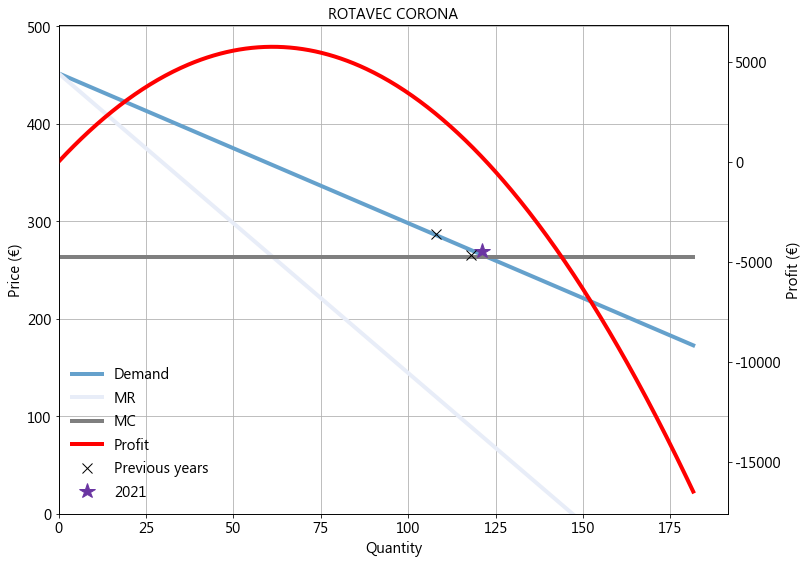

In [25]:
med = 0
profit_improvement = []
epsilon = []
z = len(topmeds)
lw = 4


for med in [10]:
    
    
    year = [2019, 2020, 2021]
    Q = [ Data.iloc[med,1], Data.iloc[med,3], Data.iloc[med,5] ]
    P = [ Data.iloc[med,0], Data.iloc[med,2], Data.iloc[med,4] ]


    if med == 0:
        year = [2019, 2021]
        Q = [ Data.iloc[med,1], Data.iloc[med,5] ]
        P = [ Data.iloc[med,0], Data.iloc[med,4] ]
    


    lm = LinearRegression().fit(np.array(Q).reshape(-1,1), P)

    a = lm.coef_[-1]
    b = lm.intercept_

    if lm.coef_[-1] > 0:
        a = -0.1*a 
        b = max(P)
        #print('Demand line altered')

    q_ = np.linspace(0, 1.5*max(Q), num=500)
    p_ = [b + a*x for x in q_]
    revenue = p_*q_
    MR = [b + 2*a*x for x in q_]
    MC = [(Data.iloc[med,6] + Data.iloc[med,7] + Data.iloc[med,8])/3 for i in q_]
    profit = revenue - MC*q_
    
    idx = np.argmin(np.abs(np.array(q_)-Q[-1]))
    elasticity = (p_[idx]/q_[idx])*(q_[idx-2]-q_[idx+2])/(p_[idx-2]-p_[idx+2])
    epsilon.append(round(elasticity,2))

    

    fig, ax = plt.subplots()

    fig.set_size_inches(12, 9)
#     ax.spines["top"].set_visible(False)
    plt.rc('font',family=font)
    plt.grid(visible=True)
    plt.rc('axes', unicode_minus=False)
    
    ax.plot(q_, p_, color='#65A1CC', linewidth = lw)
    ax.plot(q_, MR, color='#E8EDF8', linewidth = lw)
    ax.plot(q_, MC, color ='#7F7F7F', linewidth = lw)
    ax.plot(np.nan, color = '#FF0000', linewidth = lw, label = 'Profit')
    ax.plot(np.nan, color='black', marker = 'x', markersize = 10, linestyle = 'None')
    ax.plot(np.nan, color='#6A35A2', marker = '*', markersize = 16, linestyle = 'None')
    
    
    ax.plot(Q[0], P[0], color='black', marker = 'x', markersize = 10)
    ax.plot(Q[-1], P[-1], color='#6A35A2', marker = '*', markersize = 16)


    plt.legend(['Demand', 'MR', 'MC', 'Profit', 'Previous years', '2021'], loc=3, frameon=False, fontsize = 15)
    
    ax.plot(Q[-2], P[-2], color='black', marker = 'x', markersize = 10)
    
    
    ax.set_xlabel('Quantity', fontname = font, fontsize = 15)
    ax.set_ylabel('Price (€)', fontname = font , fontsize = 15)
    ax.set_title(topmeds[med], fontname = font , fontsize = 15)
    ax.set_xlim(0, max(q_)+10)
    ax.set_ylim(0, max(p_)+50)
    plt.xticks(fontname = font, fontsize = 15)
    plt.yticks(fontname = font, fontsize = 15)

    ax2 = ax.twinx()
    ax2.plot(q_, profit, color='#FF0000', linewidth = lw)

    ax2.set_ylabel("Profit (€)", fontname = font , fontsize = 15)
    
    plt.xticks(fontname = font, fontsize = 15)
    plt.yticks(fontname = font, fontsize = 15)

    
    
    plt.savefig('Rotavec.png')
    plt.show()
    
    


# Profit gain

    max_profit = max(profit)
    q_max_profit = q_[list(profit).index(max_profit)]
    q_actual_profit = Q[-1]
    actual_profit = (p_[np.argmin(np.abs(np.array(q_)-Q[-1]))]-MC[-1])*Q[-1]
    
    
    if (q_max_profit < q_actual_profit) and (max_profit > actual_profit):
        
        gain = max_profit - actual_profit
        profit_improvement.append(round(gain,0))
        
    if (q_max_profit > q_actual_profit) and (max_profit > actual_profit):
        
        gain = p_[np.argmin(np.abs(np.array(q_)-1.1*Q[-1]))]*1.1*Q[-1]-MC[-1]*1.1*Q[-1] - actual_profit
        profit_improvement.append(round(gain,0))

    else:
        profit_improvement.append(0)    
        
# print('Potential profit gain: ', gain)

# print(actual_profit)
# print(max_profit)
# print(q_actual_profit)
# print(q_max_profit)



In [14]:
print(sum([x for x in profit_improvement if x>100])/sorted2021.iloc[:,1].sum())
#print(epsilon)

0.009927649199033845


In [15]:
sorted2021.iloc[0:133,:].describe()

,Statistiques médicaments 2021,Revenue,Quantity,Profit,Price,Unit Cost,Profit margin,Cumulative revenue
count,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,66.00000,2902.398120,181.728195,711.648722,143.111114,108.156398,0.265494,0.478646
std,38.53786,2769.305788,626.509165,875.090326,164.444604,134.579283,0.181396,0.168231
min,0.00000,1005.260000,3.000000,-543.860000,0.496910,0.123033,-0.082932,0.044898
25%,33.00000,1520.910000,9.000000,244.190000,18.484105,13.678136,0.117393,0.367795
50%,66.00000,2038.130000,38.000000,537.440000,75.803462,45.723457,0.315063,0.515311
75%,99.00000,3202.250000,118.000000,847.080000,209.801250,141.190000,0.425196,0.620456
max,132.00000,24964.150000,6182.040000,4624.100000,822.390000,749.240000,0.555774,0.694250


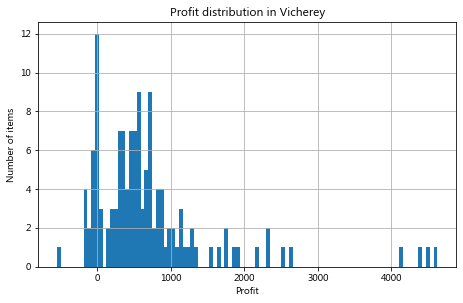

In [16]:
plt.hist(sorted2021.iloc[0:133,3], bins=100)
plt.rcParams["figure.figsize"] = (7.5,4.5)
plt.xlabel('Profit', fontname = font)
plt.ylabel('Number of items', fontname = font)
plt.xticks(fontname = font)
plt.title('Profit distribution in Vicherey', fontname=font)
plt.yticks(fontname = font)
plt.rc('axes', unicode_minus=False)
plt.grid(visible=True)
plt.savefig('Profit Vicherey.png')

In [17]:
print('Sum of revenues of TOP 10 in 2019 : ', sorted2019.iloc[:,1].sum())
print('Percent of total revenue in 2019 : ', round(sorted2019.iloc[0:10,1].sum()/sorted2019.iloc[:,1].sum(),2))
      
print('\nSum of revenues of TOP 10 in 2020 : ', sorted2020.iloc[:,1].sum())
print('Percent of total revenue in 2020 : ', round(sorted2020.iloc[0:10,1].sum()/sorted2020.iloc[:,1].sum(),2))

print('\nSum of revenues of TOP 10 in 2021 : ', sorted2021.iloc[:,1].sum())
print('Percent of total revenue in 2021 : ', round(sorted2021.iloc[0:10,1].sum()/sorted2021.iloc[:,1].sum(),2))

Sum of revenues of TOP 10 in 2019 :  535059.4900000001
Percent of total revenue in 2019 :  0.19

Sum of revenues of TOP 10 in 2020 :  594852.75
Percent of total revenue in 2020 :  0.19

Sum of revenues of TOP 10 in 2021 :  556022.87
Percent of total revenue in 2021 :  0.18


In [18]:
print(len(df2021))

1103


In [ ]:
print(sum([x for x in sorted2021.iloc[:,3] if x<-50]))

In [ ]:
print([x for x in sorted2021.iloc[:,3] if x<-50])

In [ ]:
x = sorted2021.iloc[0:133]
x[x['Profit'] < -100]